
Camino más corto con Dijkstra: ['A', 'B', 'E', 'F'] (longitud: 6)


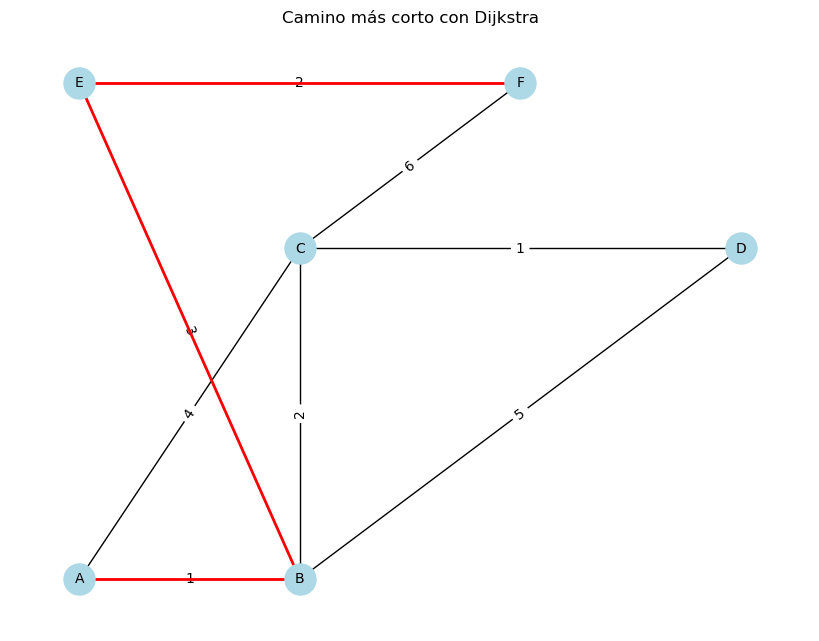

Camino más corto con A* (heurística euclidiana): ['A', 'B', 'E', 'F'] (longitud: 6)


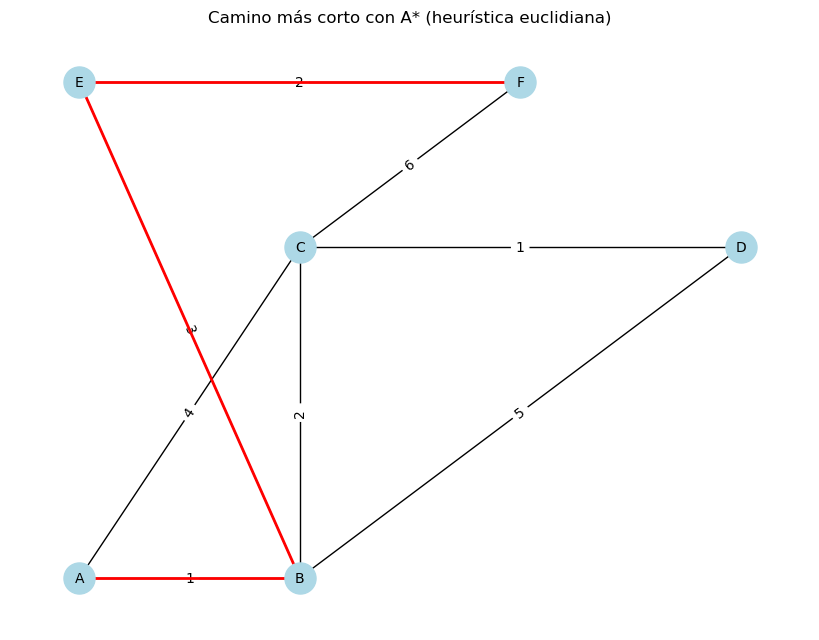

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from math import sqrt

def create_graph_from_dict(graph_dict):
    """
    Crea un grafo ponderado a partir de un diccionario donde cada clave es un nodo y 
    cada valor es un diccionario con los nodos vecinos y sus pesos.
    """
    G = nx.Graph()
    for node, edges in graph_dict.items():
        for neighbor, weight in edges.items():
            G.add_edge(node, neighbor, weight=weight)
    return G

def draw_graph_with_path(G, path, title, node_positions=None):
    """
    Dibuja el grafo y resalta el camino más corto.
    """
    pos = node_positions if node_positions else nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
    
    # Resaltar el camino más corto
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title(title)
    plt.show()

def euclidean_heuristic(node1, node2, node_positions):
    """
    Calcula la distancia euclidiana entre dos nodos.
    """
    x1, y1 = node_positions[node1]
    x2, y2 = node_positions[node2]
    return sqrt((x1 - x2)**2 + (y1 - y2)**2)

def shortest_path_astar(G, source, target, node_positions):
    """
    Encuentra el camino más corto y su longitud usando el algoritmo A* con heurística euclidiana.
    """
    def heuristic(n1, n2):
        return euclidean_heuristic(n1, n2, node_positions)

    path = nx.astar_path(G, source, target, heuristic=heuristic)
    length = nx.astar_path_length(G, source, target, heuristic=heuristic)
    return path, length

# Diccionario del grafo  con conexiones válidas
graph_dict = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5, 'E': 3},
    'C': {'A': 4, 'B': 2, 'D': 1, 'F': 6},
    'D': {'B': 5, 'C': 1},
    'E': {'B': 3, 'F': 2},
    'F': {'C': 6, 'E': 2}
}

# Coordenadas para la heurística euclidiana
node_positions = {
    'A': (0, 0),
    'B': (1, 0),
    'C': (1, 2),
    'D': (3, 2),
    'E': (0, 3),
    'F': (2, 3)
}

# Crear el grafo
G = create_graph_from_dict(graph_dict)

# Pedir nodos de origen y destino
source = input("Ingresa el nodo de origen: ")
target = input("Ingresa el nodo de destino: ")

# Validar si existe un camino antes de calcularlo
if nx.has_path(G, source, target):
    # Algoritmo de Dijkstra
    path_dijkstra = nx.dijkstra_path(G, source, target)
    length_dijkstra = nx.dijkstra_path_length(G, source, target)
    print(f"\nCamino más corto con Dijkstra: {path_dijkstra} (longitud: {length_dijkstra})")
    draw_graph_with_path(G, path_dijkstra, "Camino más corto con Dijkstra", node_positions)

    # Algoritmo A* con heurística euclidiana
    path_astar, length_astar = shortest_path_astar(G, source, target, node_positions)
    print(f"Camino más corto con A* (heurística euclidiana): {path_astar} (longitud: {length_astar})")
    draw_graph_with_path(G, path_astar, "Camino más corto con A* (heurística euclidiana)", node_positions)
else:
    print(f"No existe un camino entre {source} y {target}.")


networkx: Biblioteca para trabajar con grafos. Permite crear grafos, añadir nodos, aristas y realizar cálculos avanzados (como caminos más cortos).

matplotlib.pyplot: Usada para graficar y visualizar el grafo.

math.sqrt: Para calcular la raíz cuadrada, utilizada en la heurística euclidiana.

1. Create_graph_from_dict

Propósito: Convierte un diccionario en un grafo con nodos y aristas ponderadas.

Entrada: Diccionario donde las claves son nodos y los valores son vecinos con sus pesos.

Salida: Un grafo de networkx.

2. Draw_graph_with_path
Propósito: Dibuja un grafo resaltando un camino (como el más corto).

Entrada: El grafo, el camino a resaltar, un título y posiciones opcionales de los nodos.

Salida: Visualización gráfica del grafo con el camino resaltado.

3. Euclidean_heuristic
Propósito: Calcula la distancia euclidiana entre dos nodos (línea recta).

Entrada: Dos nodos y sus posiciones (x, y).

Salida: Distancia euclidiana entre los nodos.

4. Shortest_path_astar
Propósito: Encuentra el camino más corto entre dos nodos usando el algoritmo A*.

Entrada: Un grafo, nodos de origen y destino, y posiciones de los nodos.

Salida: El camino más corto y su longitud.

Flujo principal
1. Define: El grafo (graph_dict) y las posiciones (node_positions).

2. Valida: Verifica si existe un camino entre el nodo origen y el destino.

3. Calcula:
Camino más corto con Dijkstra.

Camino más corto con A* usando heurística euclidiana.

4. Visualiza: Muestra el grafo y el camino resaltado.
